<a href="https://colab.research.google.com/github/JingchenYan1/Intro-to-ML/blob/main/Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Training Linear Model with Learning Rate: 0.1
Linear Model - LR 0.1, Epoch 0, Loss: 171.86834716796875
Linear Model - LR 0.1, Epoch 500, Loss: 2.927645206451416
Linear Model - LR 0.1, Epoch 1000, Loss: 2.927645206451416
Linear Model - LR 0.1, Epoch 1500, Loss: 2.927645206451416
Linear Model - LR 0.1, Epoch 2000, Loss: 2.927645206451416
Linear Model - LR 0.1, Epoch 2500, Loss: 2.927645206451416
Linear Model - LR 0.1, Epoch 3000, Loss: 2.927645206451416
Linear Model - LR 0.1, Epoch 3500, Loss: 2.927645206451416
Linear Model - LR 0.1, Epoch 4000, Loss: 2.927645206451416
Linear Model - LR 0.1, Epoch 4500, Loss: 2.927645206451416
Linear Model - LR 0.1, Epoch 4999, Loss: 2.927645206451416
Final parameters - w: 9.034907341003418, b: 10.499999046325684

Training Nonlinear Model with Learning Rate: 0.1
Nonlinear Model - LR 0.1, Epoch 0, Loss: 154.07113647460938
Nonlinear Model - LR 0.1, Epoch 500, Loss: 2.090719699859619
Nonlinear Model - LR 0.1, Epoch 1000, Loss: 2.090719699859619
Nonlinear M

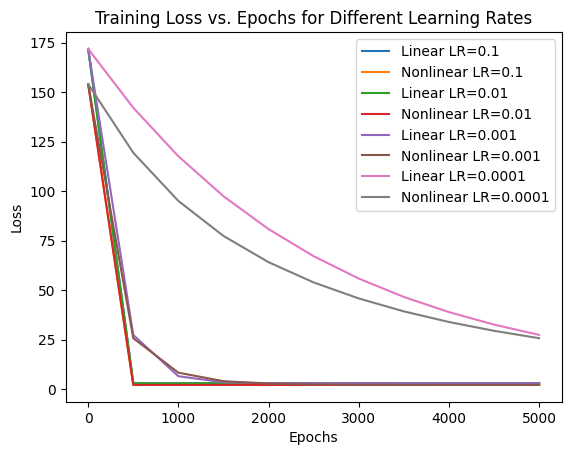

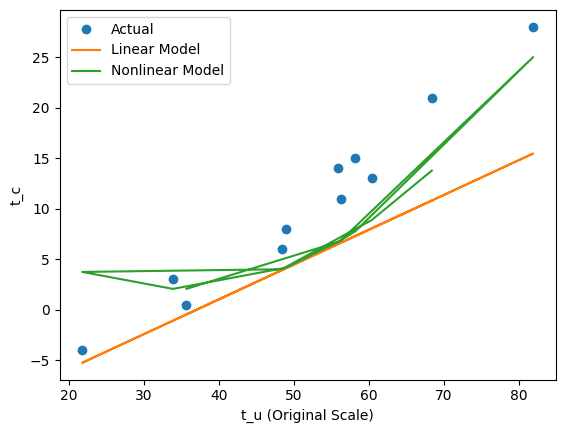

In [17]:
import torch
from torch.optim import SGD
import matplotlib.pyplot as plt

t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])

mean_t_u = t_u.mean()
std_t_u = t_u.std()
t_u_normalized = (t_u - mean_t_u) / std_t_u

def model_1(t_u, w, b):
    return w * t_u + b

def model_2(t_u, w2, w1, b):
    return w2 * t_u ** 2 + w1 * t_u + b

def loss(t_p, t_c):
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()

def train_linear_model(t_u, t_c, learning_rate, epochs):
    w = torch.tensor(1.0, requires_grad=True)
    b = torch.tensor(0.0, requires_grad=True)
    optimizer = SGD([w, b], lr=learning_rate)

    training_losses = []

    for epoch in range(epochs):
        t_p = model_1(t_u, w, b)
        current_loss = loss(t_p, t_c)

        optimizer.zero_grad()
        current_loss.backward()
        optimizer.step()

        if epoch % 500 == 0 or epoch == epochs - 1:
            print(f"Linear Model - LR {learning_rate}, Epoch {epoch}, Loss: {current_loss.item()}")
            training_losses.append(current_loss.item())

    return w, b, training_losses

def train_nonlinear_model(t_u, t_c, learning_rate, epochs):
    w2 = torch.tensor(1.0, requires_grad=True)
    w1 = torch.tensor(1.0, requires_grad=True)
    b = torch.tensor(0.0, requires_grad=True)
    optimizer = SGD([w2, w1, b], lr=learning_rate)

    training_losses = []

    for epoch in range(epochs):
        t_p = model_2(t_u, w2, w1, b)
        current_loss = loss(t_p, t_c)

        optimizer.zero_grad()
        current_loss.backward()
        optimizer.step()

        if epoch % 500 == 0 or epoch == epochs - 1:
            print(f"Nonlinear Model - LR {learning_rate}, Epoch {epoch}, Loss: {current_loss.item()}")
            training_losses.append(current_loss.item())

    return w2, w1, b, training_losses

learning_rates = [0.1, 0.01, 0.001, 0.0001]
epochs = 5000

for lr in learning_rates:
    print(f"\nTraining Linear Model with Learning Rate: {lr}")
    w, b, linear_losses = train_linear_model(t_u_normalized, t_c, learning_rate=lr, epochs=epochs)
    print(f"Final parameters - w: {w.item()}, b: {b.item()}")

    print(f"\nTraining Nonlinear Model with Learning Rate: {lr}")
    w2, w1, b, nonlinear_losses = train_nonlinear_model(t_u_normalized, t_c, learning_rate=lr, epochs=epochs)
    print(f"Final parameters - w2: {w2.item()}, w1: {w1.item()}, b: {b.item()}")

    plt.plot(range(0, epochs + 1, 500), linear_losses, label=f'Linear LR={lr}')
    plt.plot(range(0, epochs + 1, 500), nonlinear_losses, label=f'Nonlinear LR={lr}')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs. Epochs for Different Learning Rates')
plt.legend()
plt.show()

t_p_linear = model_1(t_u_normalized, w, b).detach()
t_p_nonlinear = model_2(t_u_normalized, w2, w1, b).detach()

plt.plot(t_u, t_c, 'o', label='Actual')
plt.plot(t_u, t_p_linear, label='Linear Model')
plt.plot(t_u, t_p_nonlinear, label='Nonlinear Model')
plt.xlabel("t_u (Original Scale)")
plt.ylabel("t_c")
plt.legend()
plt.show()


Training with learning rate: 0.1
Epoch 0, Training Loss: 0.07433880120515823, Validation Loss: 0.0802936926484108
Epoch 500, Training Loss: 0.010270876809954643, Validation Loss: 0.017457541078329086
Epoch 1000, Training Loss: 0.010123549960553646, Validation Loss: 0.017230285331606865
Epoch 1500, Training Loss: 0.010120014660060406, Validation Loss: 0.017197096720337868
Epoch 2000, Training Loss: 0.010119825601577759, Validation Loss: 0.01718914695084095
Epoch 2500, Training Loss: 0.010119812563061714, Validation Loss: 0.017187176272273064
Epoch 3000, Training Loss: 0.010119812563061714, Validation Loss: 0.017186671495437622
Epoch 3500, Training Loss: 0.010119812563061714, Validation Loss: 0.01718655414879322
Epoch 4000, Training Loss: 0.010119812563061714, Validation Loss: 0.017186524346470833
Epoch 4500, Training Loss: 0.010119812563061714, Validation Loss: 0.017186520621180534
Epoch 4999, Training Loss: 0.010119812563061714, Validation Loss: 0.017186520621180534
Training with learn

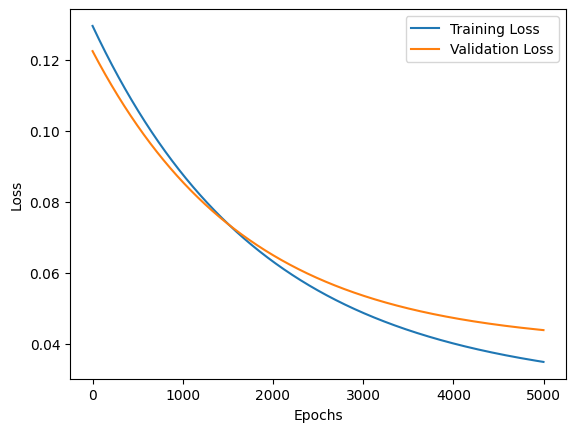

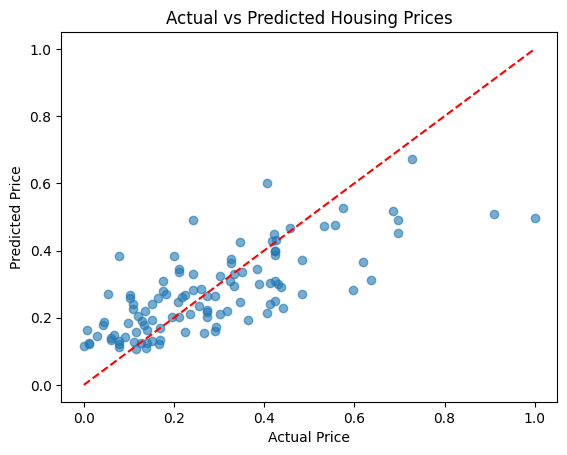

In [19]:
import numpy as np
import pandas as pd
import torch
from torch.optim import SGD
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

file_path = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))

selected_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
housing = housing[selected_features]

scaler = MinMaxScaler()
housing[selected_features] = scaler.fit_transform(housing[selected_features])

X = housing.drop('price', axis=1)
y = housing['price']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)

class LinearRegressionModel(torch.nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

def train_model(X_train, y_train, X_val, y_val, learning_rate, epochs):
    input_dim = X_train.shape[1]
    model = LinearRegressionModel(input_dim)
    criterion = torch.nn.MSELoss()
    optimizer = SGD(model.parameters(), lr=learning_rate)

    training_loss = []
    validation_loss = []

    for epoch in range(epochs):

        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            y_val_pred = model(X_val)
            val_loss = criterion(y_val_pred, y_val)

        if epoch % 500 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}")

        training_loss.append(loss.item())
        validation_loss.append(val_loss.item())

    return model, training_loss, validation_loss

learning_rates = [0.1, 0.01, 0.001, 0.0001]
epochs = 5000
best_model = None
best_val_loss = float('inf')

for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    model, train_loss, val_loss = train_model(X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, lr, epochs)

    if val_loss[-1] < best_val_loss:
        best_val_loss = val_loss[-1]
        best_model = model
        best_lr = lr

print(f"Best learning rate: {best_lr}, Best validation loss: {best_val_loss}")

plt.plot(range(len(train_loss)), train_loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

with torch.no_grad():
    y_pred = best_model(X_val_tensor)

plt.scatter(y_val_tensor.numpy(), y_pred.numpy(), alpha=0.6)
plt.plot([y_val_tensor.min(), y_val_tensor.max()], [y_val_tensor.min(), y_val_tensor.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Housing Prices")
plt.show()


Training with learning rate: 0.1
Epoch 0, Training Loss: 25234795134976.0, Validation Loss: 9244992602112.0
Epoch 500, Training Loss: 978057101312.0, Validation Loss: 1753588301824.0
Epoch 1000, Training Loss: 970304651264.0, Validation Loss: 1766076579840.0
Epoch 1500, Training Loss: 969929392128.0, Validation Loss: 1770144268288.0
Epoch 2000, Training Loss: 969904881664.0, Validation Loss: 1771285118976.0
Epoch 2500, Training Loss: 969903046656.0, Validation Loss: 1771615027200.0
Epoch 3000, Training Loss: 969902718976.0, Validation Loss: 1771711889408.0
Epoch 3500, Training Loss: 969902915584.0, Validation Loss: 1771739545600.0
Epoch 4000, Training Loss: 969902850048.0, Validation Loss: 1771748065280.0
Epoch 4500, Training Loss: 969902850048.0, Validation Loss: 1771749244928.0
Epoch 4999, Training Loss: 969902850048.0, Validation Loss: 1771749244928.0
Training with learning rate: 0.01
Epoch 0, Training Loss: 25234788843520.0, Validation Loss: 27397837553664.0
Epoch 500, Training Los

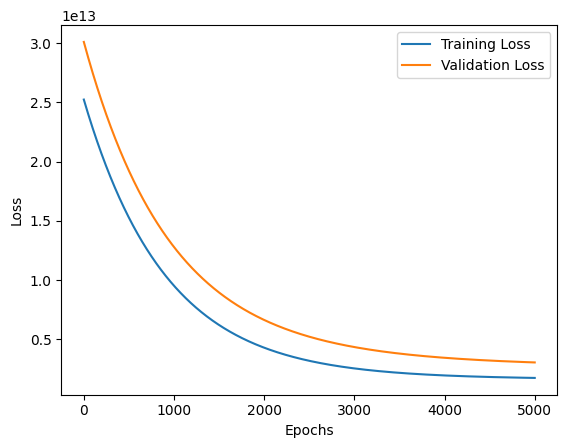

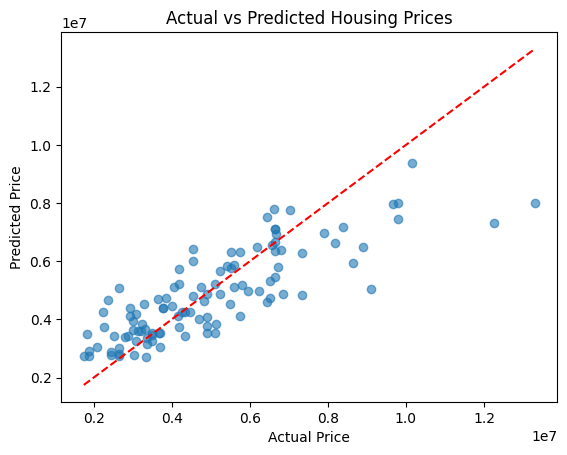

In [21]:
import numpy as np
import pandas as pd
import torch
from torch.optim import SGD
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

file_path = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))

varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
housing[varlist] = housing[varlist].apply(lambda x: x.map({'yes': 1, 'no': 0}))

furnishingstatus_map = {'furnished': 1, 'semi-furnished': 0.5, 'unfurnished': 0}
housing['furnishingstatus'] = housing['furnishingstatus'].map(furnishingstatus_map)

X = housing.drop('price', axis=1)
y = housing['price']

scaler = MinMaxScaler()
X[X.columns] = scaler.fit_transform(X)
housing['price'] = scaler.fit_transform(housing[['price']])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)

class LinearRegressionModel(torch.nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

def train_model(X_train, y_train, X_val, y_val, learning_rate, epochs):
    input_dim = X_train.shape[1]
    model = LinearRegressionModel(input_dim)
    criterion = torch.nn.MSELoss()
    optimizer = SGD(model.parameters(), lr=learning_rate)

    training_loss = []
    validation_loss = []

    for epoch in range(epochs):
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            y_val_pred = model(X_val)
            val_loss = criterion(y_val_pred, y_val)

        if epoch % 500 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}")

        training_loss.append(loss.item())
        validation_loss.append(val_loss.item())

    return model, training_loss, validation_loss

learning_rates = [0.1, 0.01, 0.001, 0.0001]
epochs = 5000
best_model = None
best_val_loss = float('inf')

for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    model, train_loss, val_loss = train_model(X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, lr, epochs)

    if val_loss[-1] < best_val_loss:
        best_val_loss = val_loss[-1]
        best_model = model
        best_lr = lr

print(f"Best learning rate: {best_lr}, Best validation loss: {best_val_loss}")

plt.plot(range(len(train_loss)), train_loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

with torch.no_grad():
    y_pred = best_model(X_val_tensor)

plt.scatter(y_val_tensor.numpy(), y_pred.numpy(), alpha=0.6)
plt.plot([y_val_tensor.min(), y_val_tensor.max()], [y_val_tensor.min(), y_val_tensor.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Housing Prices")
plt.show()
